In [8]:
import folium

# 지도의 중심을 설정합니다. 여기서는 세계 지도를 중심으로 합니다.
map_center = [37.5665, 126.978]

# folium.Map을 사용하여 지도를 생성합니다.
mymap = folium.Map(location=map_center, zoom_start=13)

# 마커를 추가합니다. 마커의 위치를 [경도, 위도]로 설정합니다.
marker = folium.Marker(location=[37.5665, 126.978], popup='Seoul')
marker.add_to(mymap)

In [10]:
import pymysql
import pandas as pd

with open("./db.config",'r') as f:
    db_data = f.read()
db_data = eval(db_data)

_host = db_data['DB_HOST']
_user = db_data['DB_USER']
_password = db_data['DB_PASSWORD']
_name = db_data['DB_NAME']

con = pymysql.connect(host=f'{_host}', user=f'{_user}', password=f'{_password}', db=f'{_name}', charset='utf8')
cur = con.cursor()

In [11]:
df_ansim = pd.read_sql_query("select * from ansim", con=con)
df_alllh = pd.read_sql_query("select * from allLh", con=con)
df_rent = pd.read_sql_query("select * from allRent", con=con)

/tmp/ipykernel_924/3272685349.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ansim = pd.read_sql_query("select * from ansim", con=con)
/tmp/ipykernel_924/3272685349.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_alllh = pd.read_sql_query("select * from allLh", con=con)
/tmp/ipykernel_924/3272685349.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_rent = pd.read_sql_query("select * from allRent", con=con)


In [12]:
df_alllh.head(3)

,kindRental,adresGu,adresWay,scaleTot,kindHouse,totArea,depositMoney,rentalMoney
0,매입임대,종로구,서울특별시 종로구 난계로29길 13,103,오피스텔,23,2000000,383117
1,매입임대,종로구,서울특별시 종로구 대학로5가길 15,1,다세대주택,27,3128000,109040
2,매입임대,종로구,서울특별시 종로구 대학로9가길 9-8,5,다가구주택,37,4275000,149350


In [13]:
df_ansim.head(3)

,kindRental,adresGu,adresWay,scaleTot,kindHouse,totArea,publicmoneyRental,publicdepositMoney,privateMoneyDepositLow,privateMoneyDepositHigh,privateMoneyRentalLow,privateMoneyRentalHigh
0,청년안심,은평구,갈현동 456-25,163,아파트,17,290000,40000000,40000000,86000000,290000,530000
1,청년안심,중랑구,상봉동 118-8,299,아파트,18,280000,43000000,43000000,132000000,280000,760000
2,청년안심,중랑구,봉우재로 111,83,아파트,17,300000,36000000,36000000,76000000,300000,600000


In [14]:
df_rent.head(3)

,yearReg,adresGu,division,totArea,depositMoney,rentalMoney,kindHouse,divisionContract
0,2023,마포구,월세,31.12,100000000,400000,오피스텔,신규
1,2023,마포구,월세,33.66,100000000,550000,오피스텔,갱신
2,2023,서초구,월세,28.80,10000000,550000,오피스텔,신규


In [15]:
df_ansim2 = pd.read_sql_query("select * from AverageAnsim", con=con)
df_alllh2 = pd.read_sql_query("select * from allLhView", con=con)

/tmp/ipykernel_924/1016888508.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_ansim2 = pd.read_sql_query("select * from AverageAnsim", con=con)
/tmp/ipykernel_924/1016888508.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_alllh2 = pd.read_sql_query("select * from allLhView", con=con)


분포 확인

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

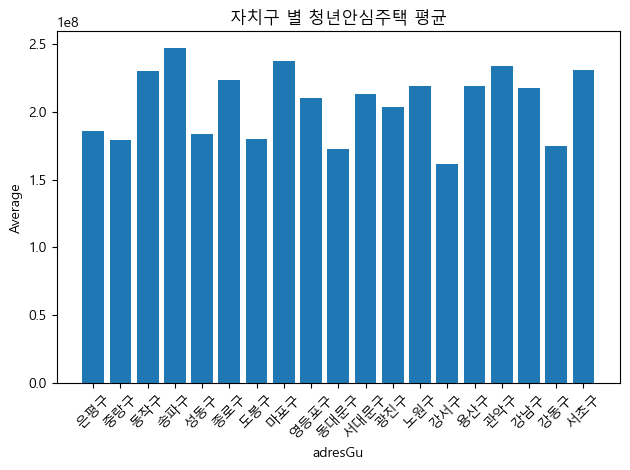

In [24]:
# 그래프 그리기
plt.bar(df_ansim2['adresGu'], df_ansim2['Average'])
plt.xlabel('adresGu')
plt.ylabel('Average')
plt.title('자치구 별 청년안심주택 평균')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.tight_layout()
plt.show()


In [51]:
df_ansim2_top5 = df_ansim2.nlargest(5, 'Average')
df_ansim2_btm5 = df_ansim2.nsmallest(5, 'Average')

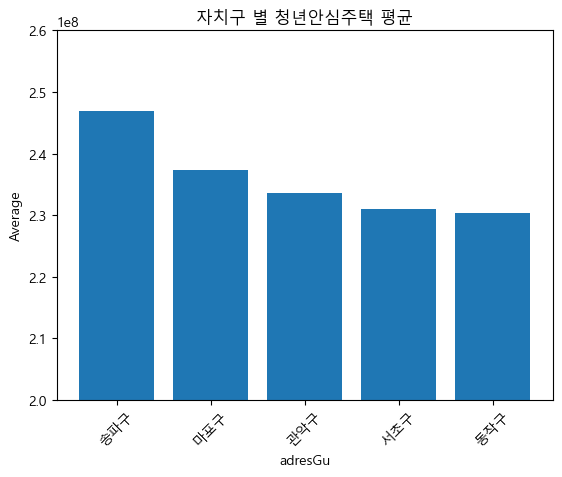

In [49]:
# 그래프 그리기
plt.bar(df_ansim2_top5['adresGu'], df_ansim2_top5['Average'])
plt.xlabel('adresGu')
plt.ylabel('Average')
plt.title('자치구 별 청년안심주택 상위 평균')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.ylim(200000000, 260000000)  # y축 범위 설정
plt.show()

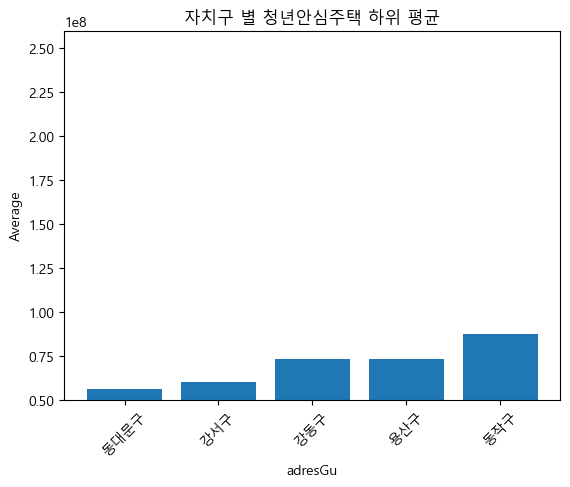

In [54]:
# 그래프 그리기
plt.bar(df_ansim2_btm5['adresGu'], df_ansim2_btm5['Average'])
plt.xlabel('adresGu')
plt.ylabel('Average')
plt.title('자치구 별 청년안심주택 하위 평균')
plt.xticks(rotation=45)  # x축 레이블 회전
plt.ylim(50000000, 260000000)  # y축 범위 설정
plt.show()

In [53]:
df_ansim2.nsmallest(5, 'Average')

,ren_type,kindRental,adresGu,Average
9,public,청년안심,동대문구,56260385
13,public,청년안심,강서구,60333718
17,public,청년안심,강동구,73357692
14,public,청년안심,용산구,73513077
2,public,청년안심,동작구,87346667


In [1]:
from matplotlib import font_manager, rc 

font_path = "/usr/share/fonts/truetype/malgun.ttf" 

font_name = font_manager.FontProperties(fname = font_path).get_name() 

In [2]:
rc('font', family=font_name) 
import matplotlib.font_manager

font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

In [3]:
font_name

'Malgun Gothic'

In [4]:
rc('font', family=font_name)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)


# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

/tmp/ipykernel_924/3707250521.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


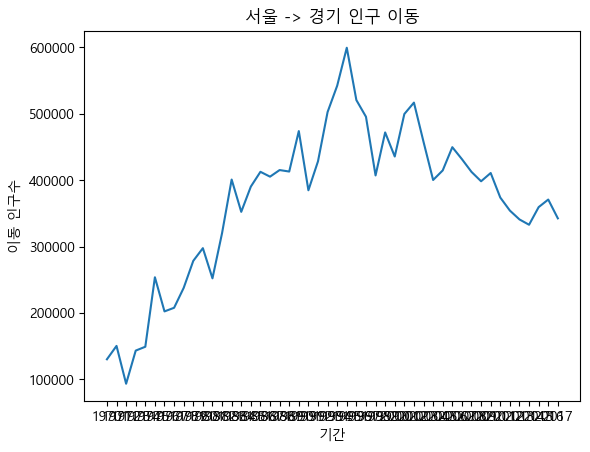

In [7]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력